# 生成正态分布随机数
NumPy包和random包中都有生成正态分布随机数的函数。

P(|X|<1.65)= 0.8974
P(|X|<1.96)= 0.9472
P(|X|<2)= 0.9506
P(|X|<2.58)= 0.9906
P(|X|<3)= 0.9968


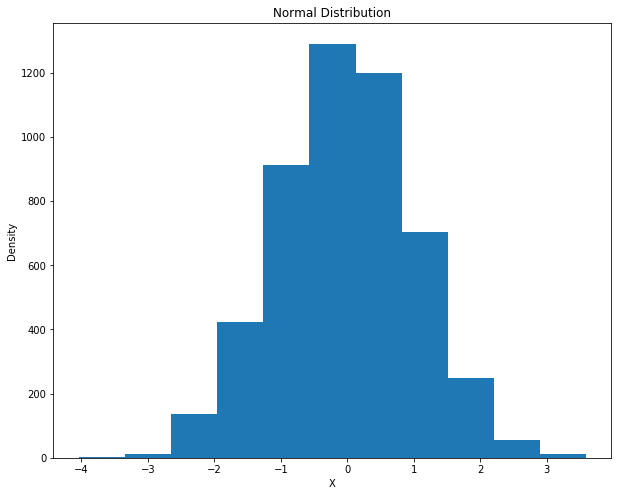

In [1]:
import numpy as np
import numpy.random as nprd

## 设定参数
N=5000 #样本容量

## 生成标准正态分布
X=nprd.randn(N)

## 计算频率
print("P(|X|<1.65)=",np.sum(abs(X)<1.65)/N)
print("P(|X|<1.96)=",np.sum(abs(X)<1.96)/N)
print("P(|X|<2)=",np.sum(abs(X)<2)/N)
print("P(|X|<2.58)=",np.sum(abs(X)<2.58)/N)
print("P(|X|<3)=",np.sum(abs(X)<3)/N)

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.hist(X,bins=11) ##柱状图
plt.xlabel('X')
plt.ylabel("Density")
plt.title('Normal Distribution')
plt.show() ## 画图

# 生成二元联合正态分布
如果$(X_1,X_2)\sim N\left(\mu,\Sigma\right)$，那么我们可以使用条件分布生成联合分布。由于：$$X_{1}|X_{2}\sim N\left(\mu_{1}+\rho\frac{\sigma_{1}}{\sigma_{2}}\left(X_{2}-\mu_{2}\right),\sigma_{1}^{2}\left(1-\rho^{2}\right)\right)$$可以将其进行分解：$$X_{1}=\mu_{1}-\rho\frac{\sigma_{1}}{\sigma_{2}}\mu_{2}+\rho\frac{\sigma_{1}}{\sigma_{2}}X_{2}+\epsilon$$其中：$\epsilon\sim N\left(0,\left(1-\rho^{2}\right)\sigma_{1}^{2}\right)$。因而我们可以先生成$X_2$，再使用以上公式生成$X_1$。

X1,X2的协方差矩阵：
 [[ 0.98665378  0.70444526]
 [ 0.70444526  2.03890462]]
X1方差： 0.985667125823
X2方差： 2.03686571636
X1,X2相关系数： 0.496668259849


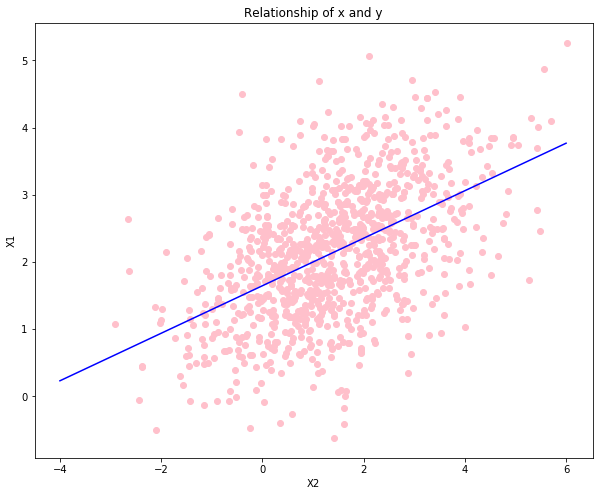

In [2]:
import numpy as np
import numpy.random as nprd

## 设定参数
mu1=2
mu2=1
sigma1=np.sqrt(1)
sigma2=np.sqrt(2)
rho=0.5
N=1000 #样本容量

## 生成正态分布X2
X2=(nprd.randn(N)+mu2)*sigma2
## 生成epsilon
epsilon=nprd.randn(N)*(sigma1*np.sqrt(1-rho**2))
## 生成X1
X1=mu1-rho*sigma1/sigma2*mu2+rho*sigma1/sigma2*X2+epsilon

## 计算协方差
print("X1,X2的协方差矩阵：\n",np.cov(X1,X2))
print("X1方差：",np.var(X1))
print("X2方差：",np.var(X2))
print("X1,X2相关系数：",np.corrcoef(X1,X2)[0,1])

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.scatter(X2,X1,color='pink') ##散点图
## 回归曲线
lp=np.linspace(-4,6,20)
y=mu1-rho*sigma1/sigma2*mu2+rho*sigma1/sigma2*lp
plt.plot(lp,y,color='blue') 
plt.xlabel('X2')
plt.ylabel("X1")
plt.title('Relationship of x and y')
plt.show() ## 画图

此外，还可以使用协方差矩阵直接生成。如果$U\sim N\left(0,I\right)$为联合标准正态分布，那么：$$X=\Sigma^{1/2}U+\mu$$即服从$N\left(\mu,\Sigma\right)$。

X1,X2的协方差矩阵：
 [[ 0.95536898  0.68892306]
 [ 0.68892306  1.96590072]]
X1方差： 0.95441360962
X2方差： 1.96393481578
X1,X2相关系数： 0.502694769881


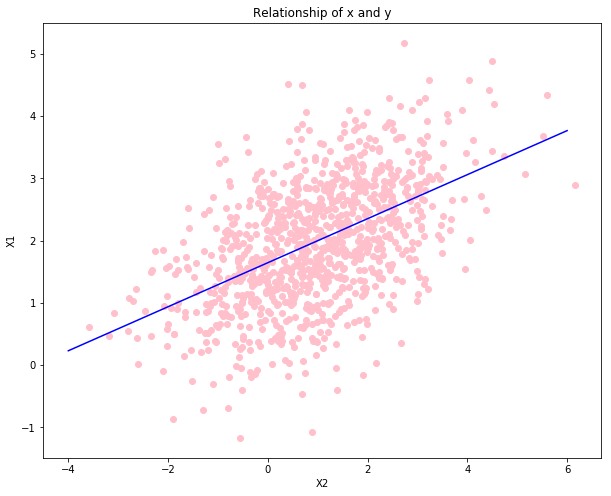

In [3]:
import numpy as np
import numpy.random as nprd

## 设定参数
mu1=2
mu2=1
sigma1=np.sqrt(1)
sigma2=np.sqrt(2)
rho=0.5
N=1000 #样本容量
Sigma=np.array([[sigma1**2,rho*sigma1*sigma2],[rho*sigma1*sigma2,sigma2**2]])

## 计算Sigma^0.5
l,L=np.linalg.eig(Sigma)
Lamb=np.array([ll**0.5 for ll in l])
Sigma1p2=np.dot(np.dot(L,np.diag(Lamb)),L.transpose())

## 生成正态分布u
U1=nprd.randn(N)
U2=nprd.randn(N)
U=np.array([U1,U2])

## 生成X
X=np.dot(Sigma1p2,U)
X1=X[0,]+mu1
X2=X[1,]+mu2

## 计算协方差
print("X1,X2的协方差矩阵：\n",np.cov(X1,X2))
print("X1方差：",np.var(X1))
print("X2方差：",np.var(X2))
print("X1,X2相关系数：",np.corrcoef(X1,X2)[0,1])

## 画图
import matplotlib.pyplot as plt
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.scatter(X2,X1,color='pink') ##散点图
## 回归曲线
lp=np.linspace(-4,6,20)
y=mu1-rho*sigma1/sigma2*mu2+rho*sigma1/sigma2*lp
plt.plot(lp,y,color='blue') 
plt.xlabel('X2')
plt.ylabel("X1")
plt.title('Relationship of x and y')
plt.show() ## 画图